In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load data
csv = pd.read_csv('train.csv')
csv.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,1971.267808,1984.865753,1057.429452,5.844521,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,472.980137,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,30.202904,20.645407,438.705324,48.623081,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,213.804841,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,1954.000000,1967.000000,795.750000,0.000000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,334.500000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,1973.000000,1994.000000,991.500000,0.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,480.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,2000.000000,2004.000000,1298.250000,0.000000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,576.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,2010.000000,2010.000000,6110.000000,572.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,1418.000000,755000.000000


In [ ]:
# Preprocessing

In [7]:
data = csv.drop('SalePrice', axis=1)
target = csv['SalePrice']
# splitting numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
# filling NaNs with 0, noting the absence of the feature in the house
for column in numerical_features:
    data.fillna({column: 0}, inplace = True)
data = pd.get_dummies(data) 

In [ ]:
# Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def regression_tree(depth):
    # split data 0.2
    data_train, data_test, target_train, target_test = train_test_split(data, target,test_size=0.2)

    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(data_train, target_train)
    prediction = model.predict(data_test)
    
    # Calculating the accuracy of the model
    mae = mean_absolute_error(target_test, prediction)
    mse = mean_squared_error(target_test, prediction)
    rmse = mse ** 0.5
    r2 = r2_score(target_test, prediction)
    # Printing and graphing
    print(f"MAE: {int(mae)}\nRMSE: {int(rmse)}\nMSE: {int(mse)}\nR2:  {r2}")
    plt.scatter(target_test, prediction)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Regression tree depth = {depth}')
    plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=4)  # Diagonal line
    plt.show()

In [ ]:
# Testing

MAE: 29145
RMSE: 45064
MSE: 2030825241
R2:  0.706604879206232


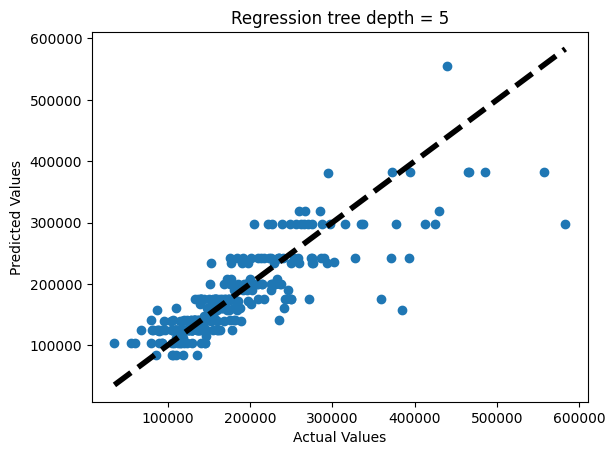

MAE: 27861
RMSE: 48972
MSE: 2398287296
R2:  0.5674545094410876


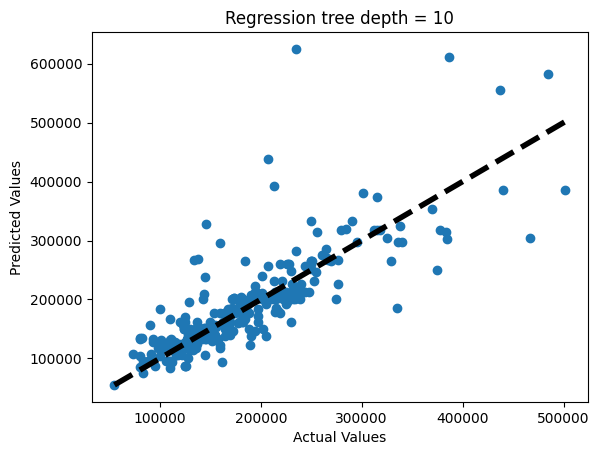

MAE: 27604
RMSE: 43199
MSE: 1866200527
R2:  0.7228407193555855


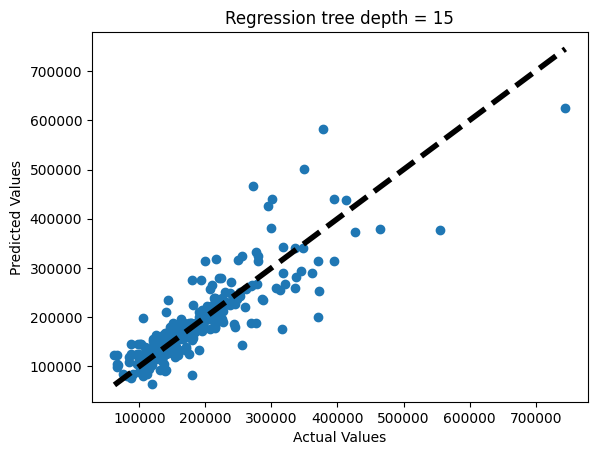

MAE: 30724
RMSE: 49330
MSE: 2433530981
R2:  0.5969874587627225


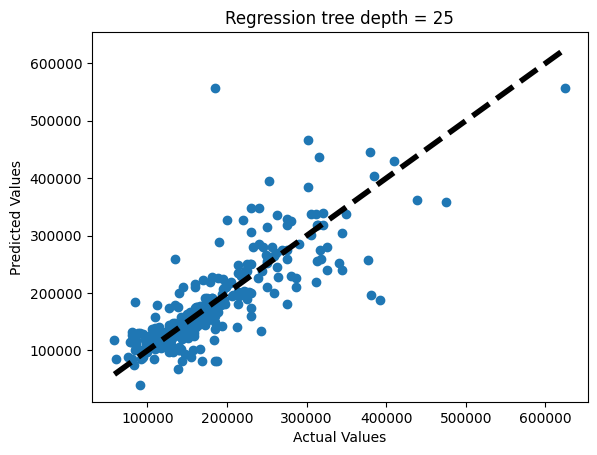

MAE: 28172
RMSE: 43239
MSE: 1869638819
R2:  0.7003792050697043


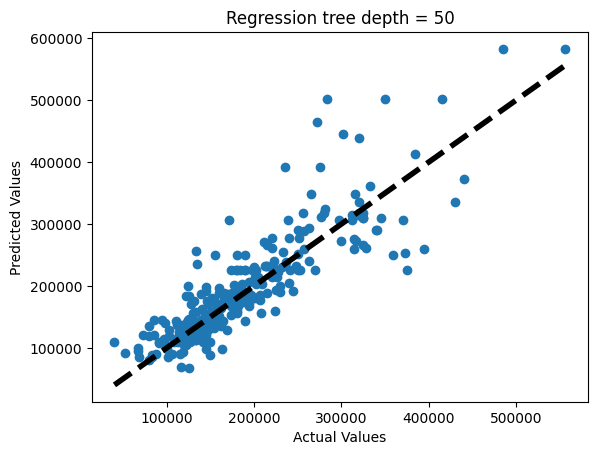

MAE: 31531
RMSE: 52242
MSE: 2729263493
R2:  0.6320742613023997


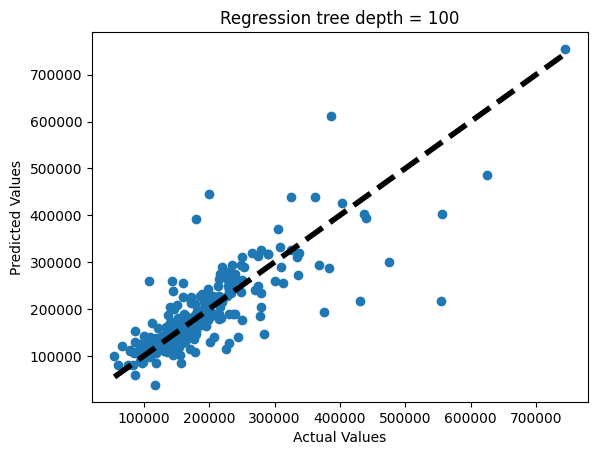

In [11]:
regression_tree(5)
regression_tree(10)
regression_tree(15)
regression_tree(25)
regression_tree(50)
regression_tree(100)